In [ ]:
import pandas as pd
from scipy.io import arff
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
arff_file = arff.loadarff('dataset_31_credit-g.arff')

In [20]:
df = pd.DataFrame(arff_file[0])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [22]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,b'<0',6.0,b'critical/other existing credit',b'radio/tv',1169.0,b'no known savings',b'>=7',4.0,b'male single',b'none',...,b'real estate',67.0,b'none',b'own',2.0,b'skilled',1.0,b'yes',b'yes',b'good'
1,b'0<=X<200',48.0,b'existing paid',b'radio/tv',5951.0,b'<100',b'1<=X<4',2.0,b'female div/dep/mar',b'none',...,b'real estate',22.0,b'none',b'own',1.0,b'skilled',1.0,b'none',b'yes',b'bad'
2,b'no checking',12.0,b'critical/other existing credit',b'education',2096.0,b'<100',b'4<=X<7',2.0,b'male single',b'none',...,b'real estate',49.0,b'none',b'own',1.0,b'unskilled resident',2.0,b'none',b'yes',b'good'
3,b'<0',42.0,b'existing paid',b'furniture/equipment',7882.0,b'<100',b'4<=X<7',2.0,b'male single',b'guarantor',...,b'life insurance',45.0,b'none',b'for free',1.0,b'skilled',2.0,b'none',b'yes',b'good'
4,b'<0',24.0,b'delayed previously',b'new car',4870.0,b'<100',b'1<=X<4',3.0,b'male single',b'none',...,b'no known property',53.0,b'none',b'for free',2.0,b'skilled',2.0,b'none',b'yes',b'bad'


In [23]:
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [25]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [ ]:
print(df.isna().sum())

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [26]:
df.duplicated().sum()

np.int64(0)

In [ ]:
columns = df.columns

for col in columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts(), '\n')
    else:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # set as NaN

checking_status
b'no checking'    394
b'<0'             274
b'0<=X<200'       269
b'>=200'           63
Name: count, dtype: int64 

credit_history
b'existing paid'                     530
b'critical/other existing credit'    293
b'delayed previously'                 88
b'all paid'                           49
b'no credits/all paid'                40
Name: count, dtype: int64 

purpose
b'radio/tv'               280
b'new car'                234
b'furniture/equipment'    181
b'used car'               103
b'business'                97
b'education'               50
b'repairs'                 22
b'domestic appliance'      12
b'other'                   12
b'retraining'               9
Name: count, dtype: int64 

savings_status
b'<100'                603
b'no known savings'    183
b'100<=X<500'          103
b'500<=X<1000'          63
b'>=1000'               48
Name: count, dtype: int64 

employment
b'1<=X<4'        339
b'>=7'           253
b'4<=X<7'        174
b'<1'            172
b'unemploye

In [27]:
cat_features = df.select_dtypes(include=['object']).columns
num_features = df.select_dtypes(include=[np.number]).columns

In [ ]:
for cat in cat_features:
    # Create a contingency table
    contingency = pd.crosstab(df[cat], df['class'])

    # Run chi-square test
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency)

    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_val:.4f}")
    print(f"Degrees of freedom: {dof}")

    # Interpretation
    if p_val < 0.05:
        print(f"Significant association exists between {cat} and class \n")
    else:
        print(f"No significant association between {cat} and class \n")
    

Chi-square statistic: 123.7209
p-value: 0.0000
Degrees of freedom: 3
Significant association exists between checking_status and class 

Chi-square statistic: 61.6914
p-value: 0.0000
Degrees of freedom: 4
Significant association exists between credit_history and class 

Chi-square statistic: 33.3564
p-value: 0.0001
Degrees of freedom: 9
Significant association exists between purpose and class 

Chi-square statistic: 36.0989
p-value: 0.0000
Degrees of freedom: 4
Significant association exists between savings_status and class 

Chi-square statistic: 18.3683
p-value: 0.0010
Degrees of freedom: 4
Significant association exists between employment and class 

Chi-square statistic: 9.6052
p-value: 0.0222
Degrees of freedom: 3
Significant association exists between personal_status and class 

Chi-square statistic: 6.6454
p-value: 0.0361
Degrees of freedom: 2
Significant association exists between other_parties and class 

Chi-square statistic: 23.7196
p-value: 0.0000
Degrees of freedom: 3
Signi

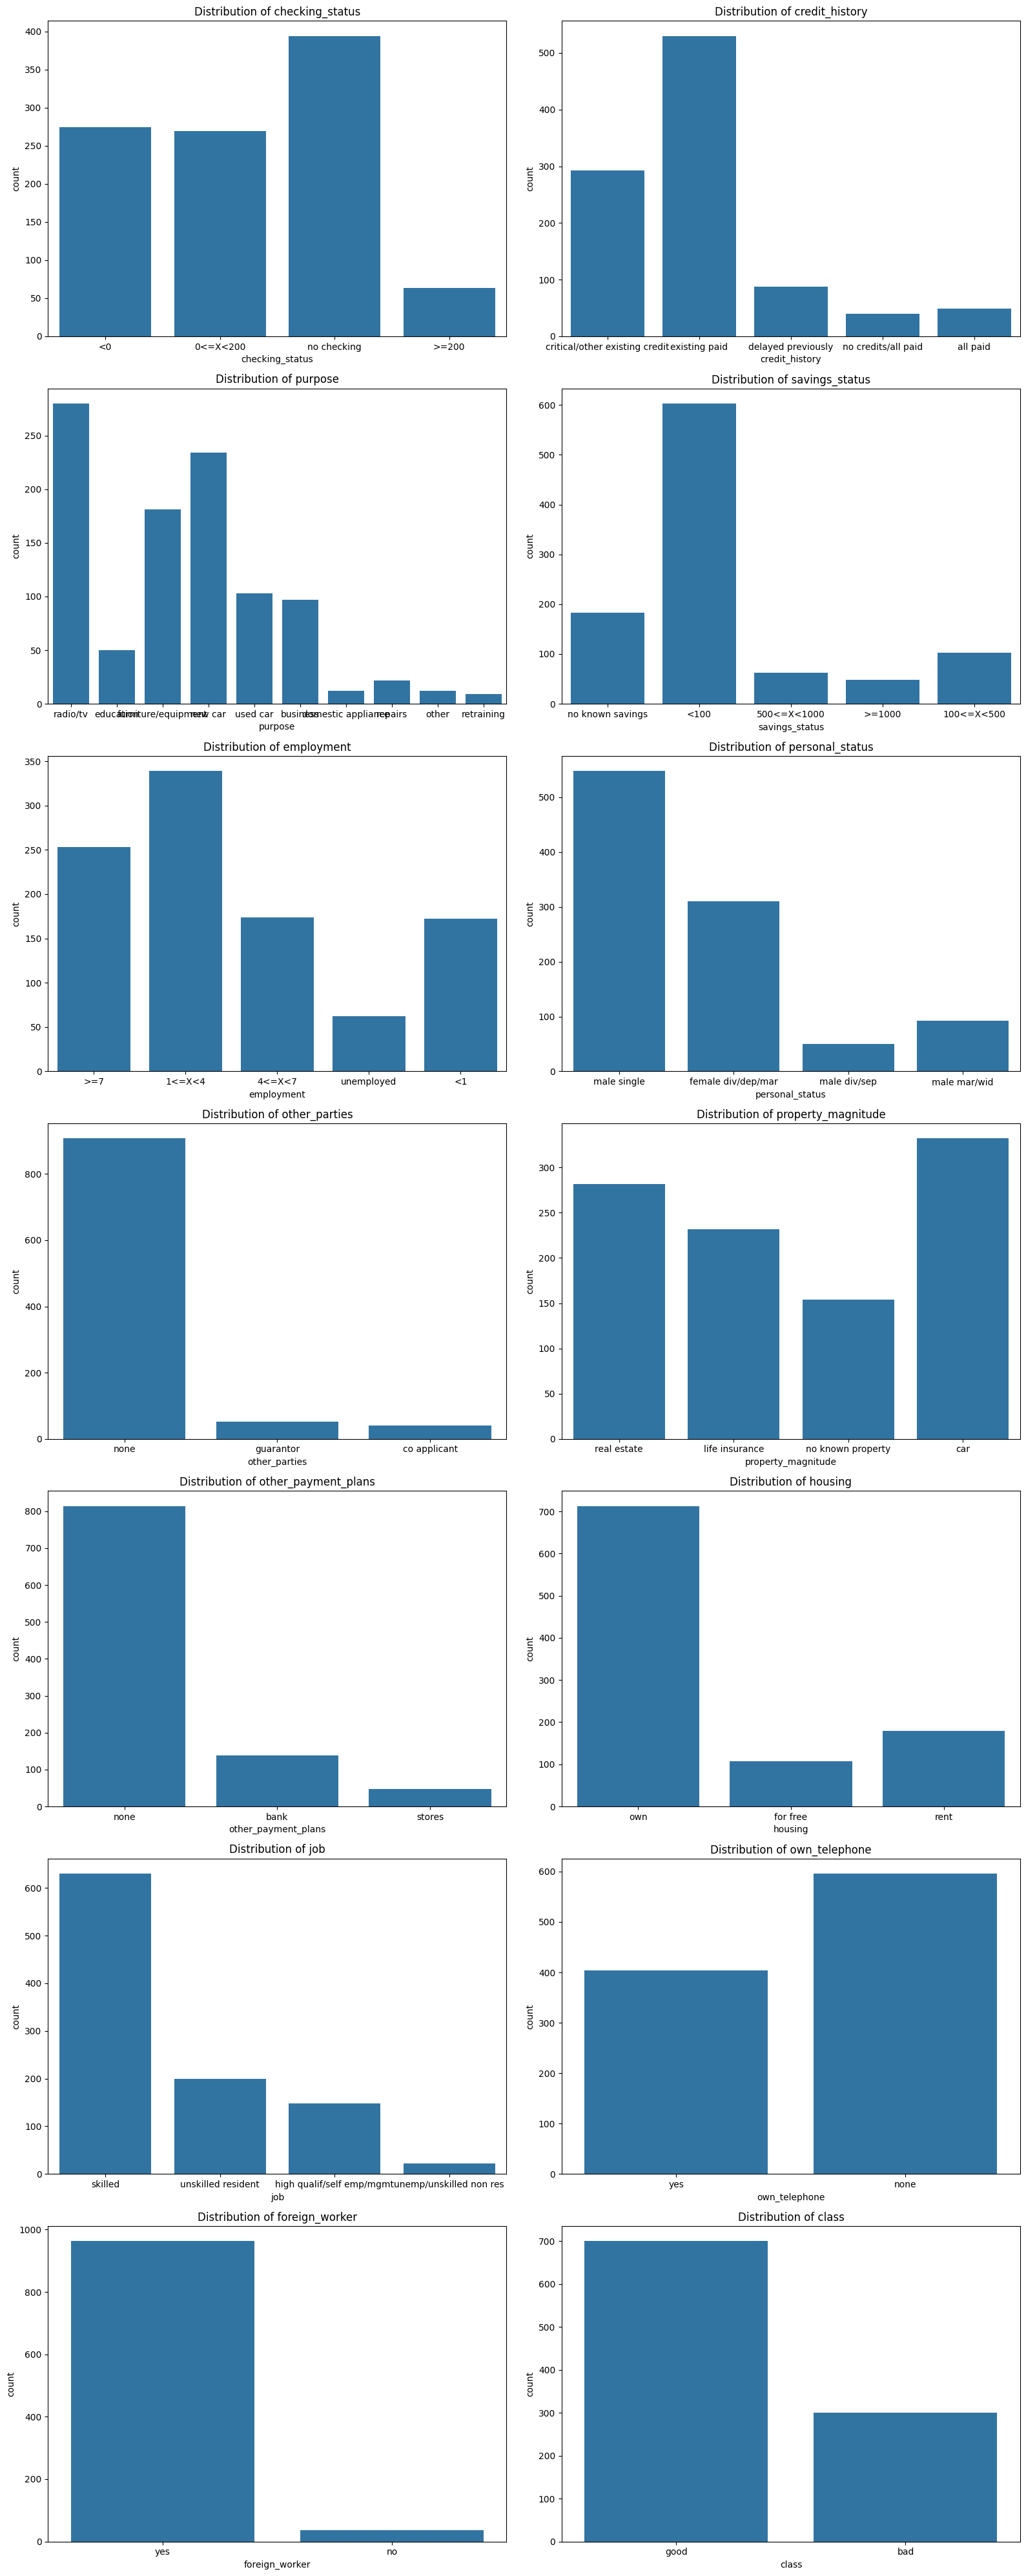

In [28]:
n_graphs_per_row = 2
if cat_features.shape[0] <= n_graphs_per_row:
    fig, axes = plt.subplots(1, cat_features.shape[0], figsize=(5*cat_features.shape[0], 5))
else:
    fig, axes = plt.subplots(cat_features.shape[0] // n_graphs_per_row, n_graphs_per_row,
                             figsize=(16, 5*(1 + cat_features.shape[0] // n_graphs_per_row)))

for idx_axis, col in enumerate(cat_features):
    # Plot feature distribution
    i, j = idx_axis // n_graphs_per_row, idx_axis % n_graphs_per_row
    sns.countplot(data=df, x=col, ax=axes[i, j])
    axes[i, j].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

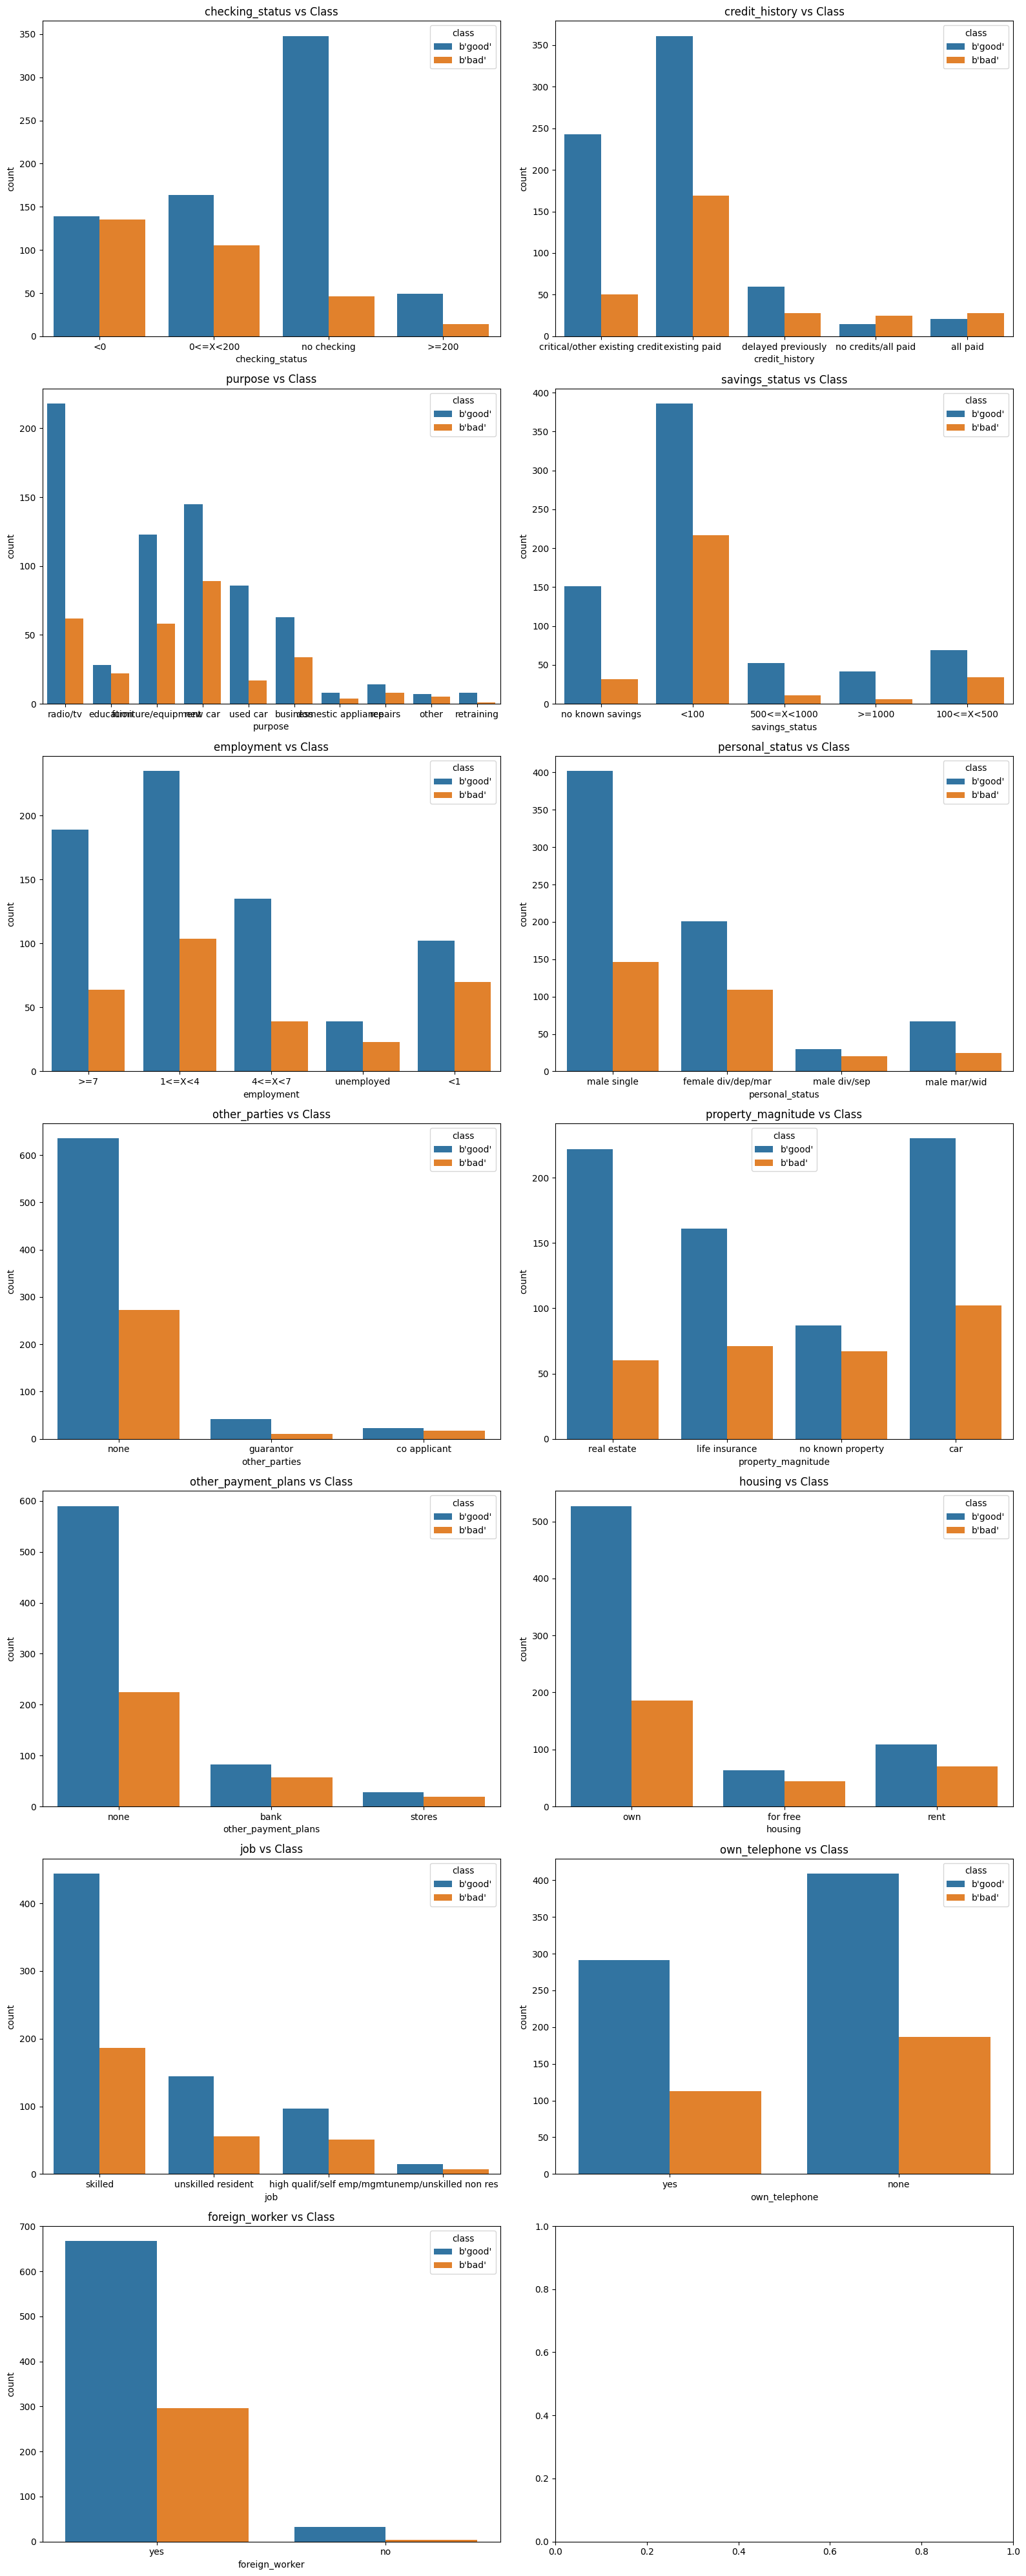

In [30]:
n_graphs_per_row = 2
if cat_features.shape[0] <= n_graphs_per_row:
    fig, axes = plt.subplots(1, cat_features.shape[0], figsize=(5*cat_features.shape[0], 5))
else:
    fig, axes = plt.subplots(cat_features.shape[0] // n_graphs_per_row, n_graphs_per_row,
                             figsize=(16, 5*(1 + cat_features.shape[0] // n_graphs_per_row)))

for idx_axis, col in enumerate(cat_features):
    # Plot feature distribution
    i, j = idx_axis // n_graphs_per_row, idx_axis % n_graphs_per_row
    
    if col.lower() == 'class':
        continue
    
    sns.countplot(data=df, x=col, hue='class', ax=axes[i, j])
    # sns.barplot(data=df, x=col, y='class', ax=axes[i, j])
    axes[i, j].set_title(f'{col} vs Class')

plt.tight_layout()
plt.show()

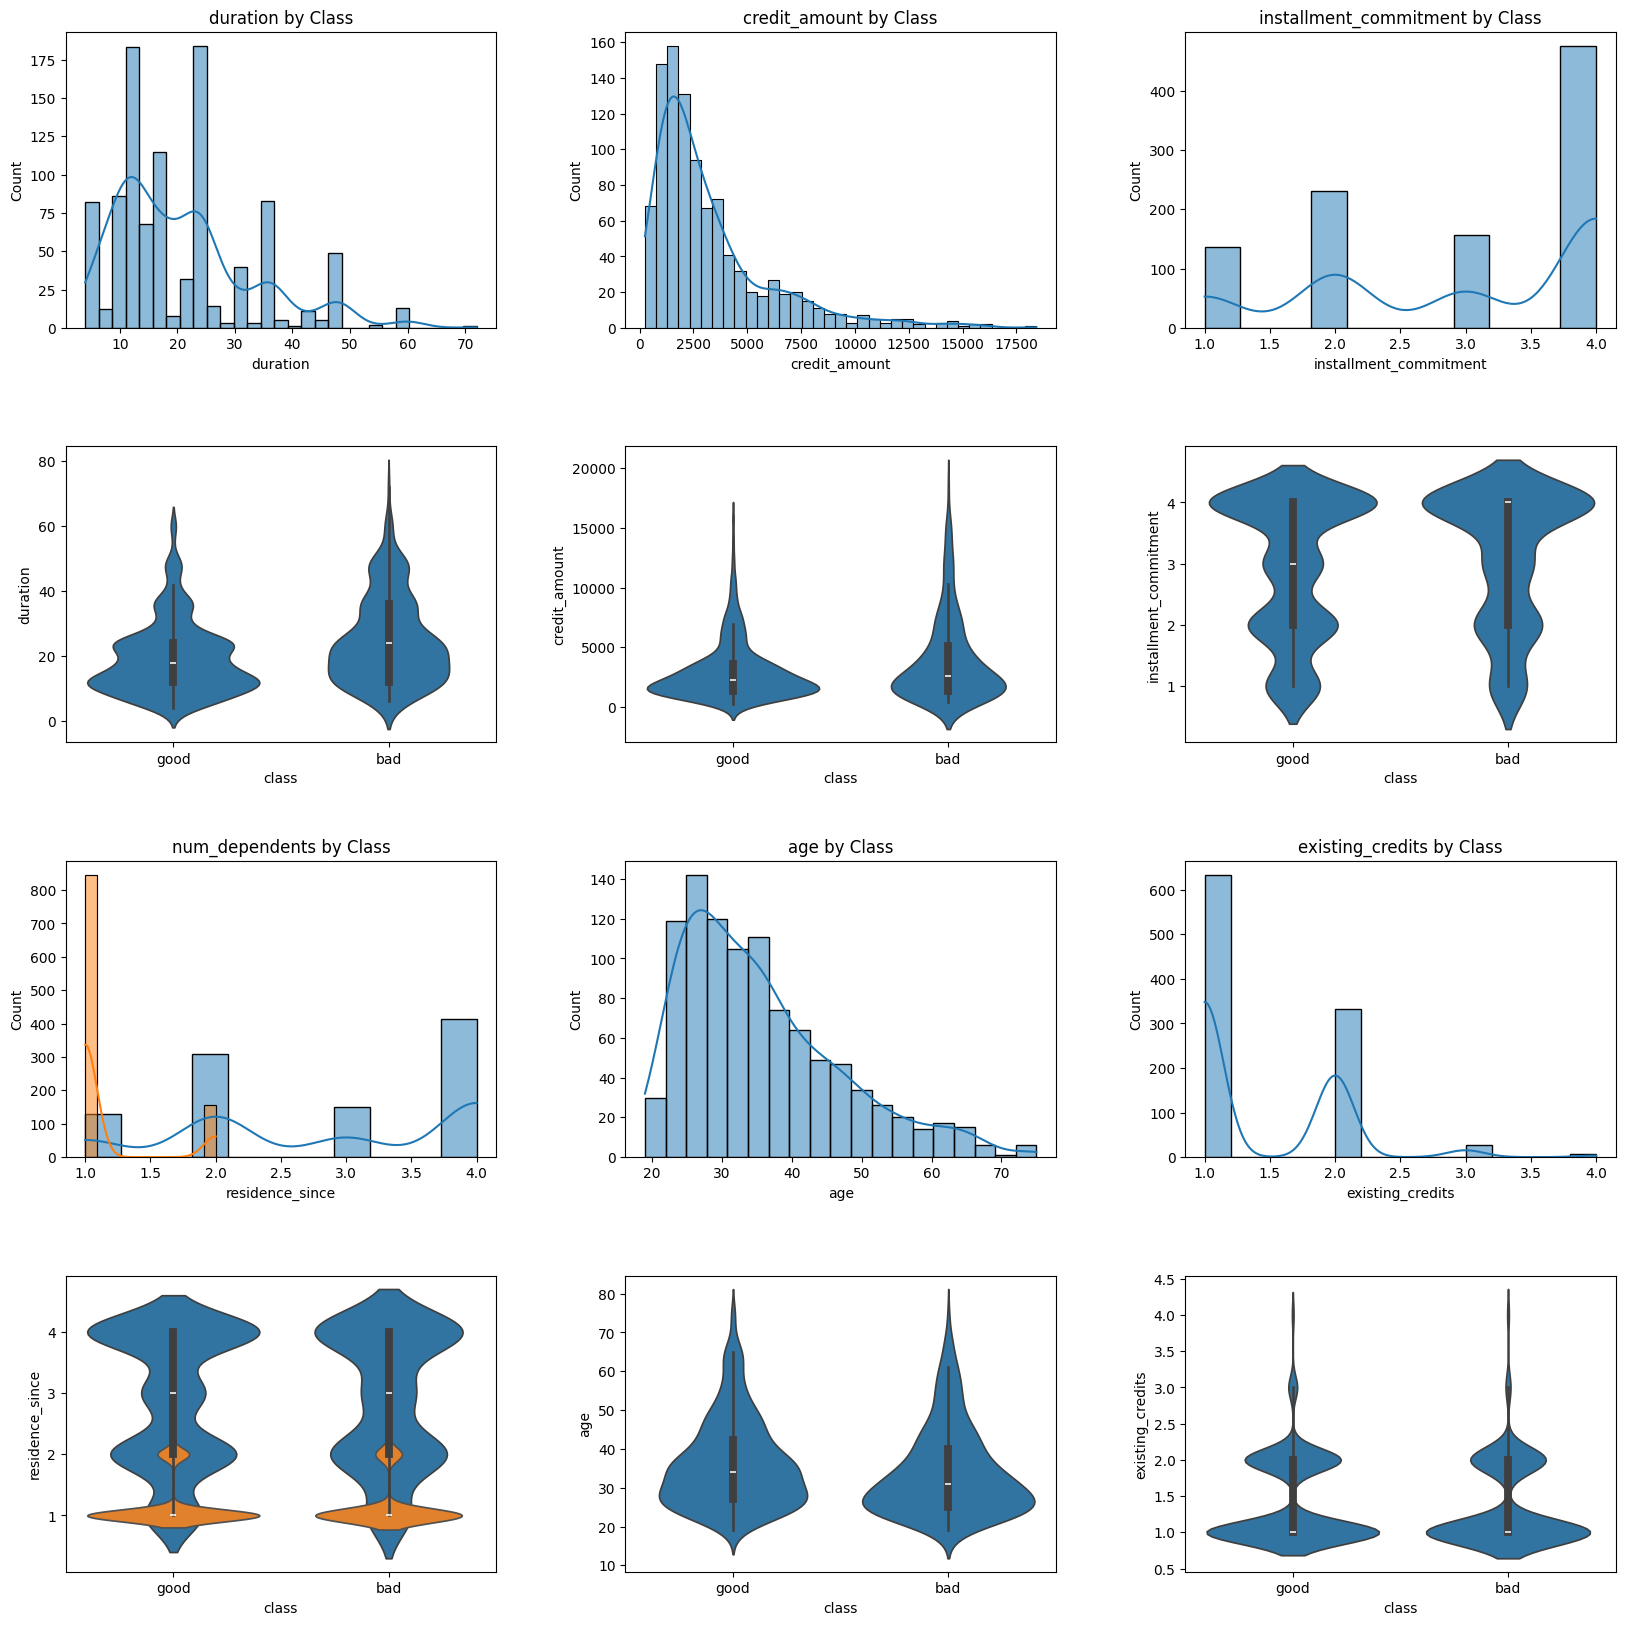

In [31]:
# Select numerical features for analysis
n = len(num_features)

# Create subplot grid
fig, axes = plt.subplots(4, int(n/2), figsize=(20, 20))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Univariate and Bivariate Analysis
for i, feature in enumerate(num_features):
    # Univariate analysis (top row)
    sns.histplot(df[feature], ax=axes[0+int(i>2)*2, i%3], kde=True)
    axes[0+int(i>2)*2, i%3].set_title(f'Distribution of {feature}')
    
    # Bivariate analysis (bottom row)
    sns.violinplot(x='class', y=feature, data=df, ax=axes[1+int(i>2)*2, i%3])
    axes[0+int(i>2)*2, i%3].set_title(f'{feature} by Class')
    
plt.show()

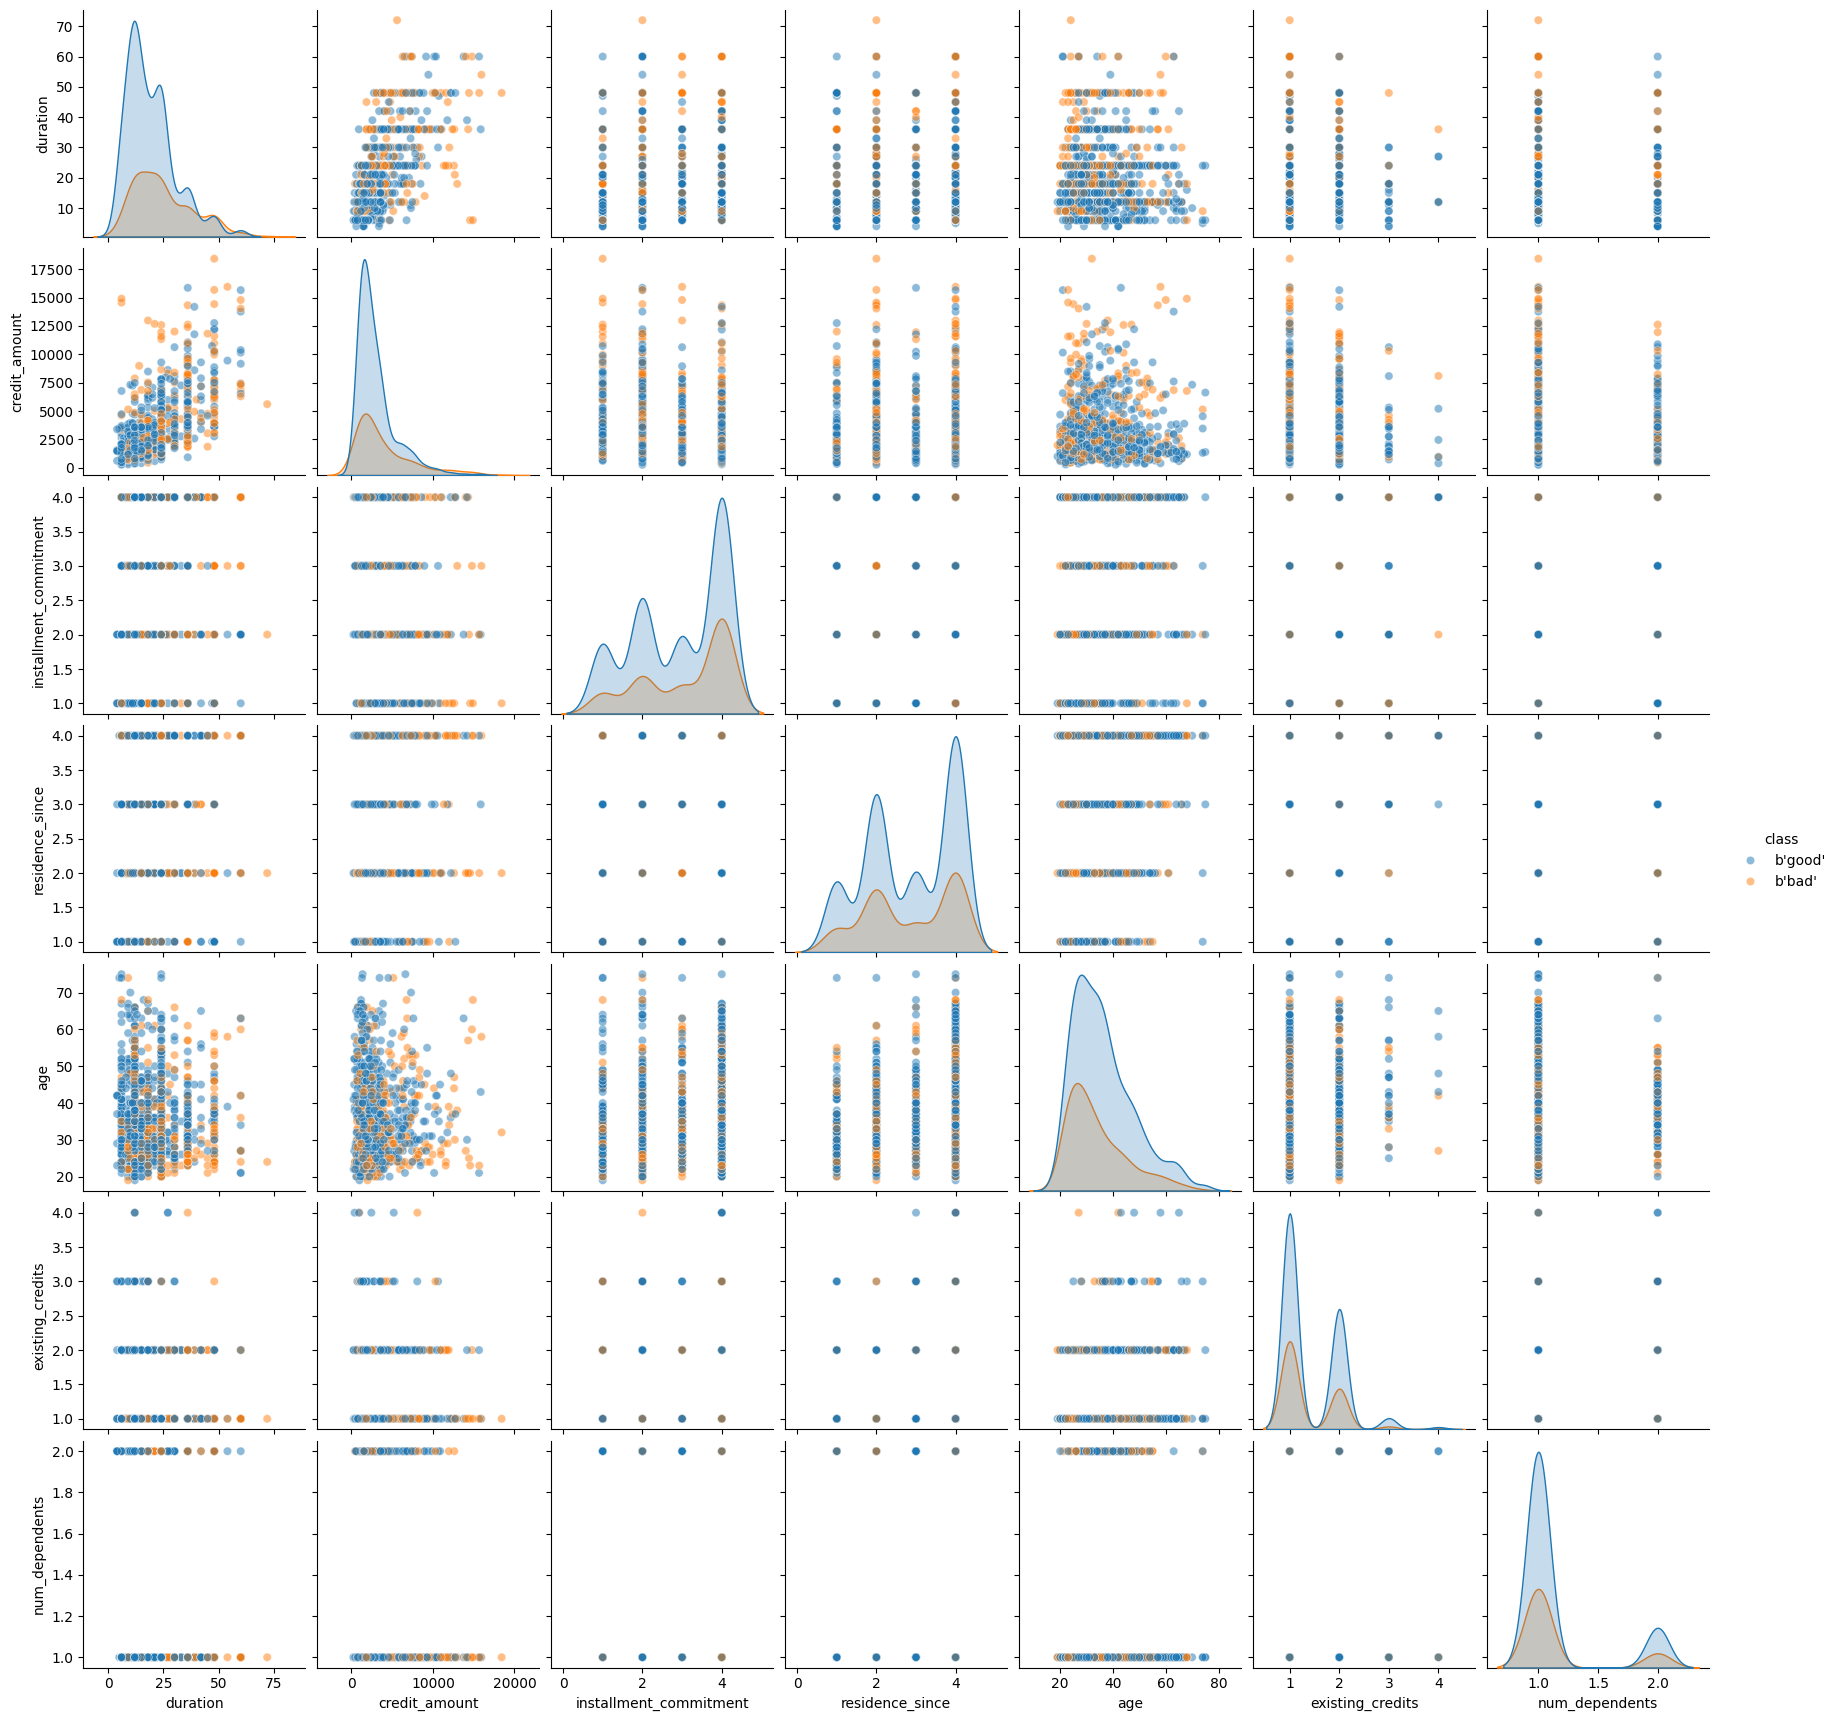

In [32]:
sns.pairplot(df, vars=num_features, hue='class', diag_kind='kde', plot_kws={'alpha':0.5})
plt.show()

In [33]:
from scipy import stats

for cat in cat_features:
    # Create a contingency table
    contingency = pd.crosstab(df[cat], df['class'])

    # Run chi-square test
    chi2, p_val, dof, expected = stats.chi2_contingency(contingency)

    print(f"Chi-square statistic: {chi2:.4f}")
    print(f"p-value: {p_val:.4f}")
    print(f"Degrees of freedom: {dof}")

    # Interpretation
    if p_val < 0.05:
        print(f"Significant association exists between {cat} and class \n")
    else:
        print(f"No significant association between {cat} and class \n")
    

Chi-square statistic: 123.7209
p-value: 0.0000
Degrees of freedom: 3
Significant association exists between checking_status and class 

Chi-square statistic: 61.6914
p-value: 0.0000
Degrees of freedom: 4
Significant association exists between credit_history and class 

Chi-square statistic: 33.3564
p-value: 0.0001
Degrees of freedom: 9
Significant association exists between purpose and class 

Chi-square statistic: 36.0989
p-value: 0.0000
Degrees of freedom: 4
Significant association exists between savings_status and class 

Chi-square statistic: 18.3683
p-value: 0.0010
Degrees of freedom: 4
Significant association exists between employment and class 

Chi-square statistic: 9.6052
p-value: 0.0222
Degrees of freedom: 3
Significant association exists between personal_status and class 

Chi-square statistic: 6.6454
p-value: 0.0361
Degrees of freedom: 2
Significant association exists between other_parties and class 

Chi-square statistic: 23.7196
p-value: 0.0000
Degrees of freedom: 3
Signi

Pearson's r: -0.2149
p-value: 0.0000
Significant negative correlation (r = -0.21) between duration and Class



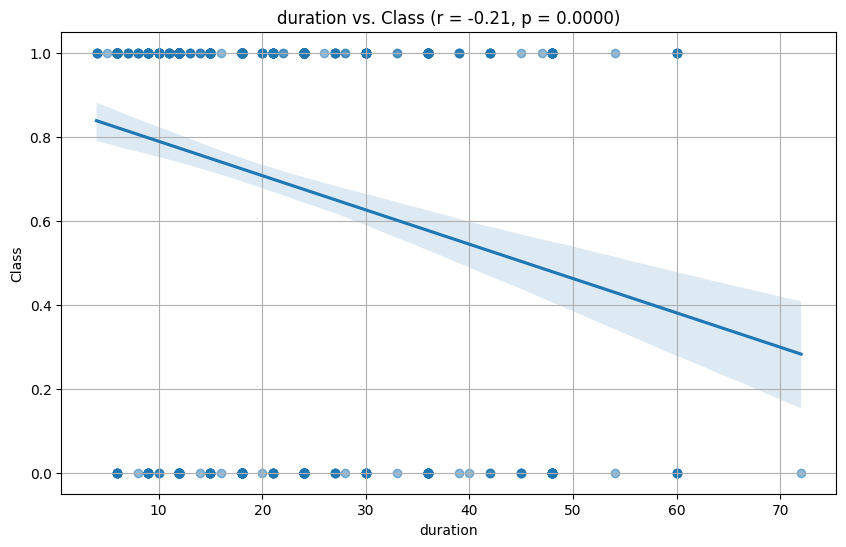

Pearson's r: -0.1547
p-value: 0.0000
Significant negative correlation (r = -0.15) between credit_amount and Class



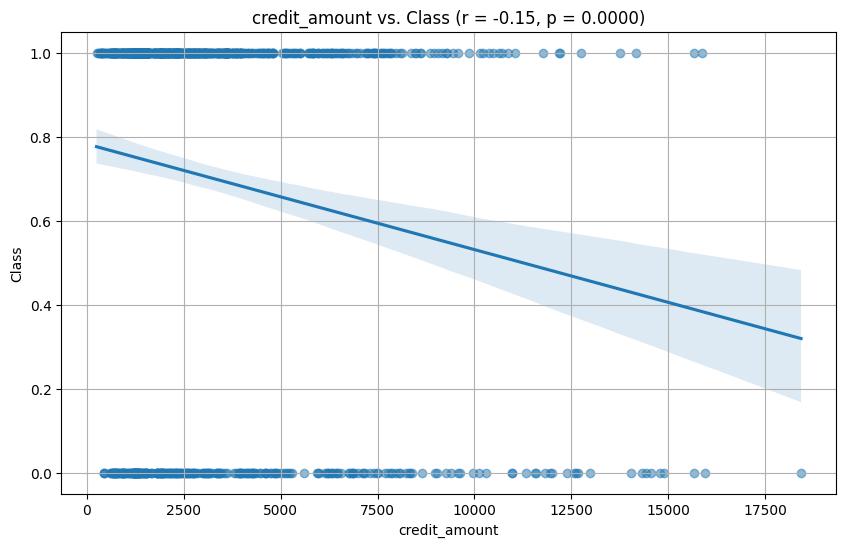

Pearson's r: -0.0724
p-value: 0.0220
Significant negative correlation (r = -0.07) between installment_commitment and Class



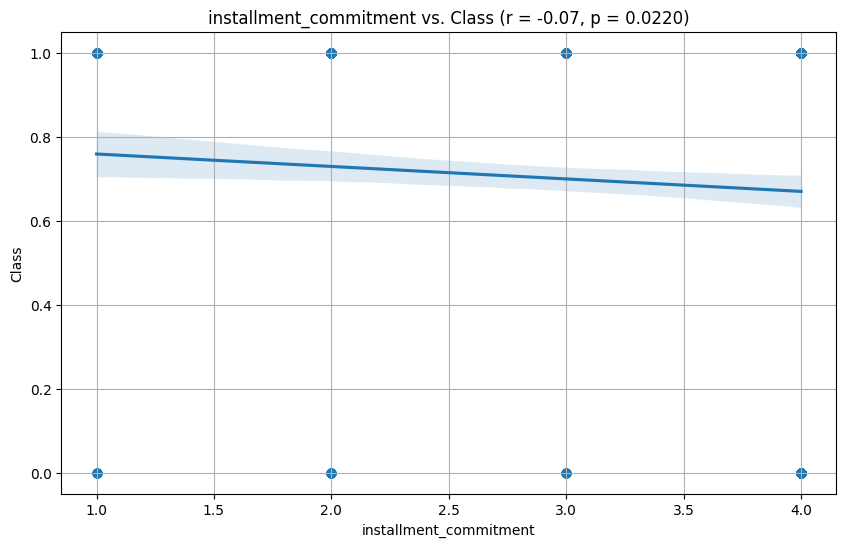

Pearson's r: -0.0030
p-value: 0.9253
No significant correlation between residence_since and Class



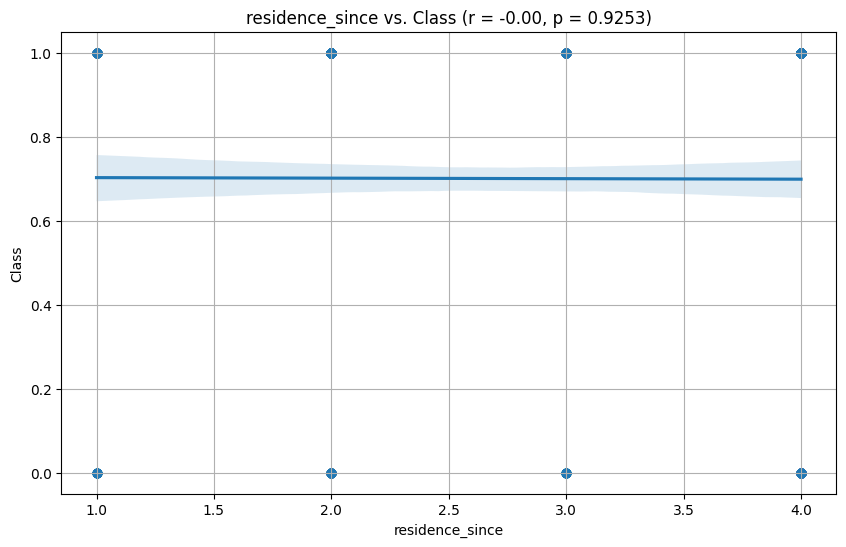

Pearson's r: 0.0911
p-value: 0.0039
Significant positive correlation (r = 0.09) between age and Class



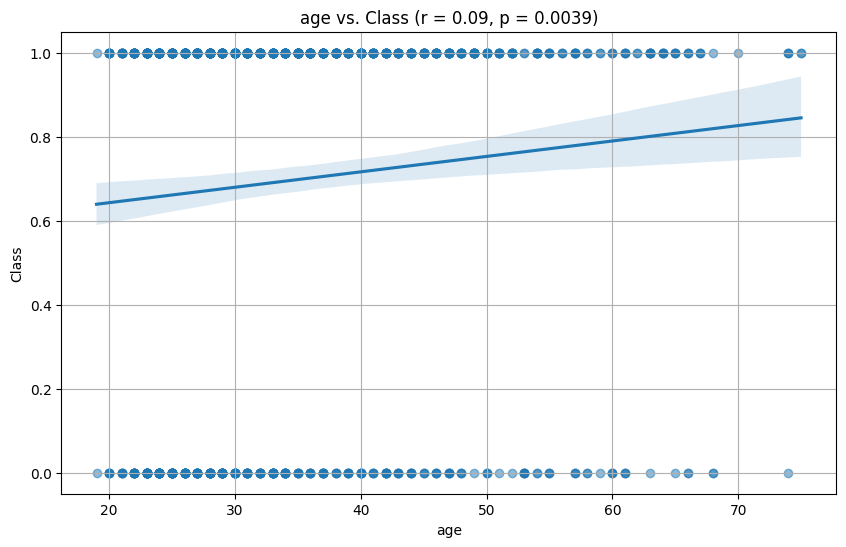

Pearson's r: 0.0457
p-value: 0.1484
No significant correlation between existing_credits and Class



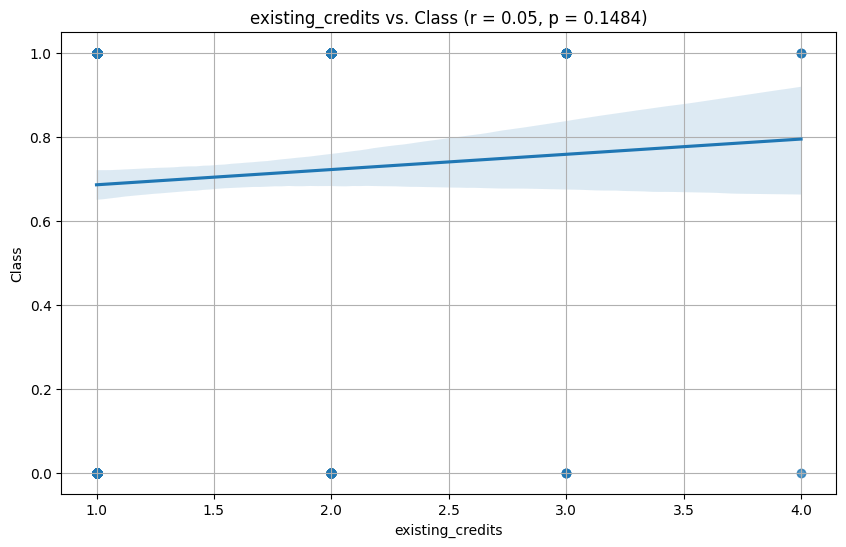

Pearson's r: 0.0030
p-value: 0.9241
No significant correlation between num_dependents and Class



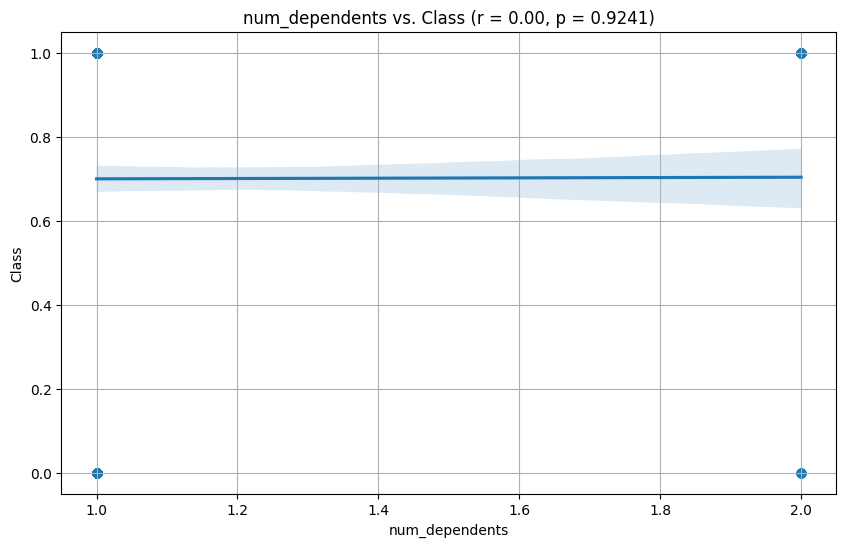

In [ ]:
df['class'] = np.where(df['class'] == b'bad', 0, 1)
for cat in num_features:
    # Calculate Pearson correlation
    r, p_val = stats.pearsonr(df[cat], df['class'])
    
    print(f"Pearson's r: {r:.4f}")
    print(f"p-value: {p_val:.4f}")
    
    if p_val < 0.05:
        if r > 0:
            print(f"Significant positive correlation (r = {r:.2f}) between {cat} and Class")
        else:
            print(f"Significant negative correlation (r = {r:.2f}) between {cat} and Class")
    else:
        print(f"No significant correlation between {cat} and Class")
    print('')

    # Visualize with scatter plot and regression line
    plt.figure(figsize=(10, 6))
    sns.regplot(x=cat, y='class', data=df, scatter_kws={'alpha':0.5})
    plt.title(f'{cat} vs. Class (r = {r:.2f}, p = {p_val:.4f})')
    plt.xlabel(cat)
    plt.ylabel('Class')
    plt.grid(True)
    plt.show()

# Prepare data and predict

In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

Index(['checking_status', 'credit_history', 'purpose', 'savings_status',
       'employment', 'personal_status', 'other_parties', 'property_magnitude',
       'other_payment_plans', 'housing', 'job', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [52]:
for cat in cat_features:
    print(cat, df[cat].unique(), '\n')

checking_status [b'<0' b'0<=X<200' b'no checking' b'>=200'] 

credit_history [b'critical/other existing credit' b'existing paid' b'delayed previously'
 b'no credits/all paid' b'all paid'] 

purpose [b'radio/tv' b'education' b'furniture/equipment' b'new car' b'used car'
 b'business' b'domestic appliance' b'repairs' b'other' b'retraining'] 

savings_status [b'no known savings' b'<100' b'500<=X<1000' b'>=1000' b'100<=X<500'] 

employment [b'>=7' b'1<=X<4' b'4<=X<7' b'unemployed' b'<1'] 

personal_status [b'male single' b'female div/dep/mar' b'male div/sep' b'male mar/wid'] 

other_parties [b'none' b'guarantor' b'co applicant'] 

property_magnitude [b'real estate' b'life insurance' b'no known property' b'car'] 

other_payment_plans [b'none' b'bank' b'stores'] 

housing [b'own' b'for free' b'rent'] 

job [b'skilled' b'unskilled resident' b'high qualif/self emp/mgmt'
 b'unemp/unskilled non res'] 

own_telephone [b'yes' b'none'] 

foreign_worker [b'yes' b'no'] 

class [1 0] 



In [ ]:
# Status of existing checking account
order = [b'<0', b'no checking', b'0<=X<200', b'>=200']
oe = OrdinalEncoder(categories=[order])
df['checking_status'] = oe.fit_transform(df[['checking_status']])

# Credit history
order = [b'critical/other existing credit',
         b'delayed previously',
         b'existing paid',
         b'no credits/all paid',
         b'all paid'] 
oe = OrdinalEncoder(categories=[order])
df['credit_history'] = oe.fit_transform(df[['credit_history']])

# Purpose
le = LabelEncoder()
df['purpose'] = le.fit_transform(df['purpose'])

# Savings account/bonds
order = [ b'no known savings', b'<100', b'100<=X<500', b'500<=X<1000', b'>=1000']
oe = OrdinalEncoder(categories=[order])
df['savings_status'] = oe.fit_transform(df[['savings_status']])

# Present employment since
order = [b'unemployed', b'<1', b'1<=X<4', b'4<=X<7', b'>=7']
oe = OrdinalEncoder(categories=[order])
df['employment'] = oe.fit_transform(df[['employment']])

# Personal status and sex
le = LabelEncoder()
df['personal_status'] = le.fit_transform(df['personal_status'])

# Other debtors / guarantors
order = [b'none', b'co applicant', b'guarantor']
oe = OrdinalEncoder(categories=[order])
df['other_parties'] = oe.fit_transform(df[['other_parties']])

# Property
order = [b'no known property', b'car', b'life insurance', b'real estate']
oe = OrdinalEncoder(categories=[order])
df['property_magnitude'] = oe.fit_transform(df[['property_magnitude']])

# Other installment plans
order = [b'stores', b'bank', b'none']
oe = OrdinalEncoder(categories=[order])
df['other_payment_plans'] = oe.fit_transform(df[['other_payment_plans']])

# Housing
order = [b'for free', b'rent', b'own']
oe = OrdinalEncoder(categories=[order])
df['housing'] = oe.fit_transform(df[['housing']])

# Job
order = [b'unemp/unskilled non res',
         b'unskilled resident',
         b'skilled',
         b'high qualif/self emp/mgmt']
oe = OrdinalEncoder(categories=[order])
df['job'] = oe.fit_transform(df[['job']])

# Telephone
order = [b'none', b'yes'] 
oe = OrdinalEncoder(categories=[order])
df['own_telephone'] = oe.fit_transform(df[['own_telephone']])

# Foreign worker
order = [b'yes', b'no']
oe = OrdinalEncoder(categories=[order])
df['foreign_worker'] = oe.fit_transform(df[['foreign_worker']])

Treatment of outliers

In [55]:
num_features

Index(['duration', 'credit_amount', 'installment_commitment',
       'residence_since', 'age', 'existing_credits', 'num_dependents'],
      dtype='object')

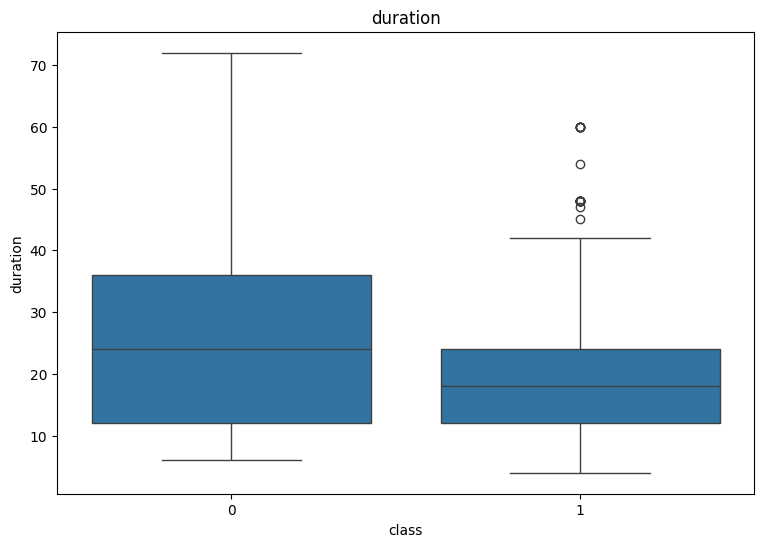

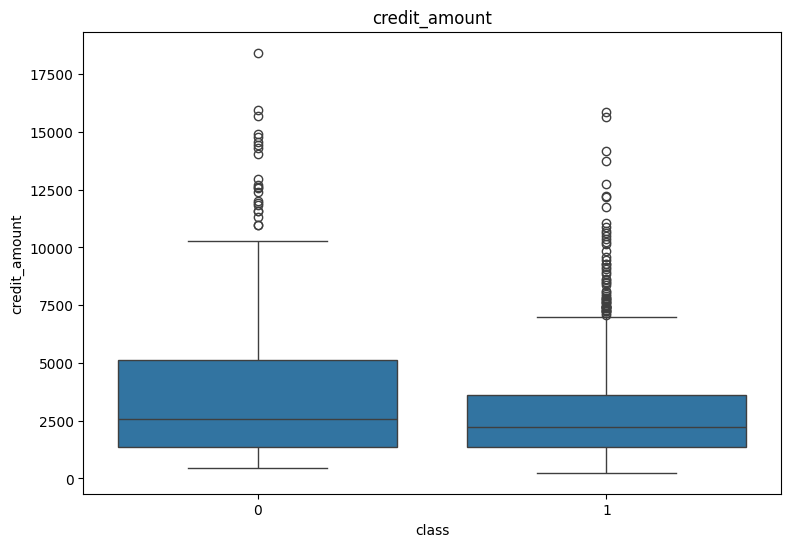

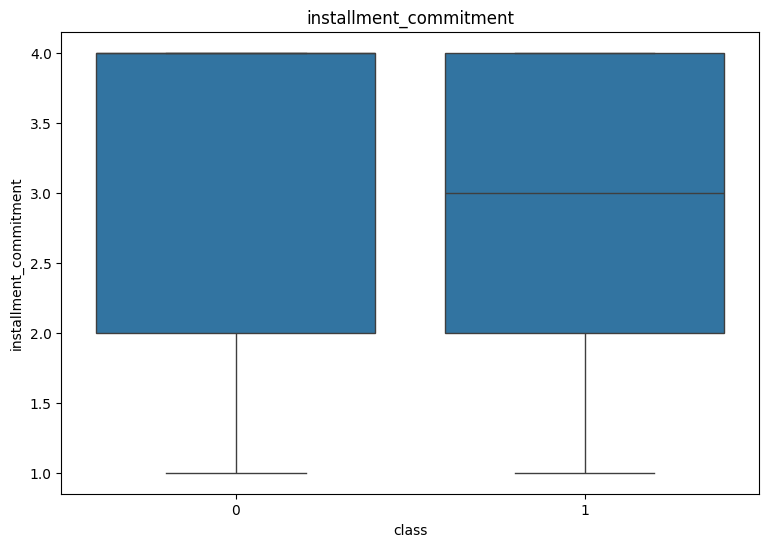

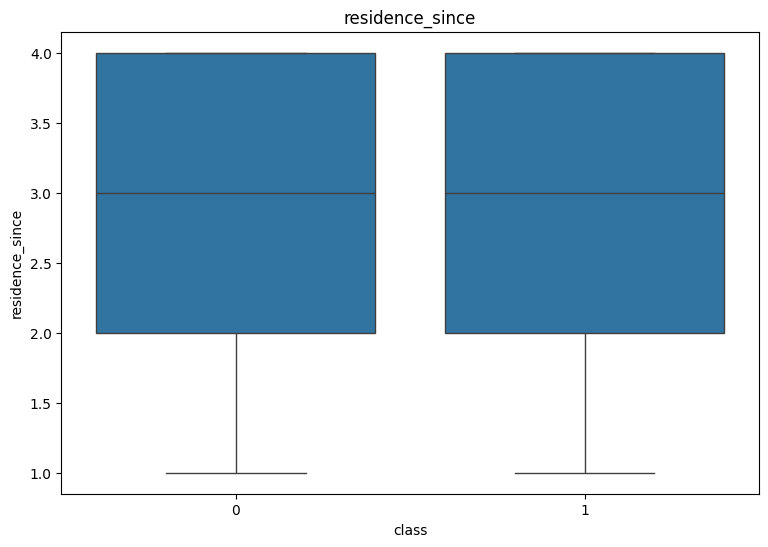

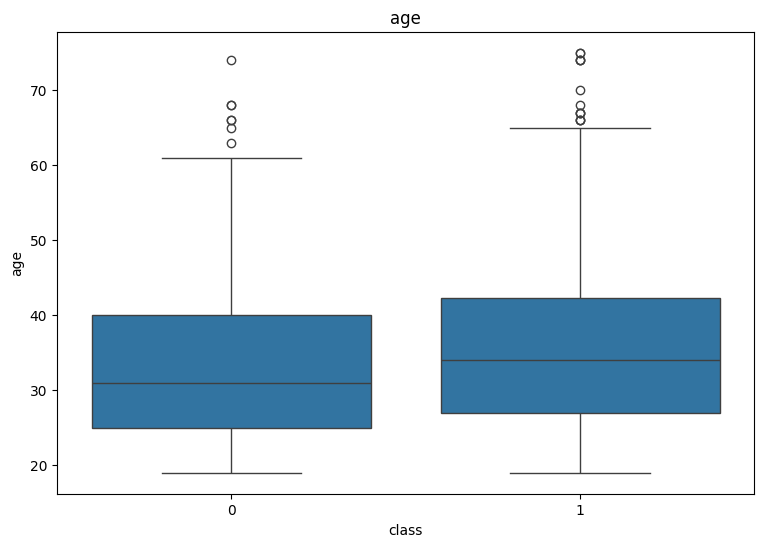

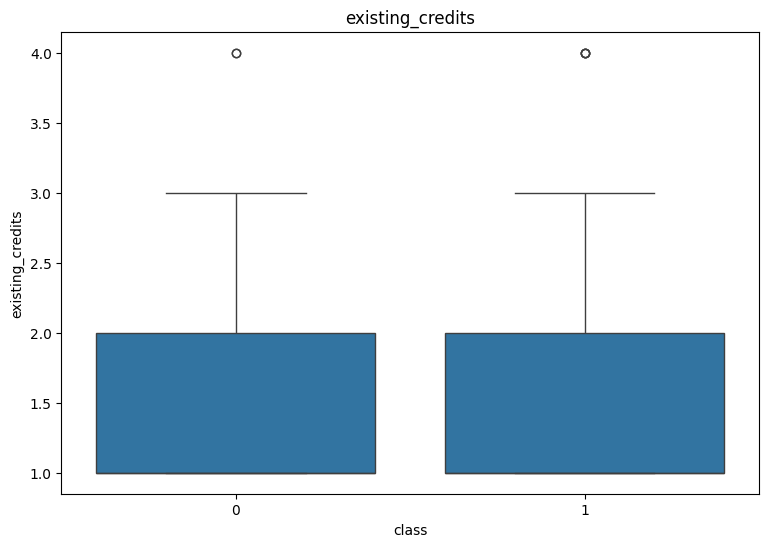

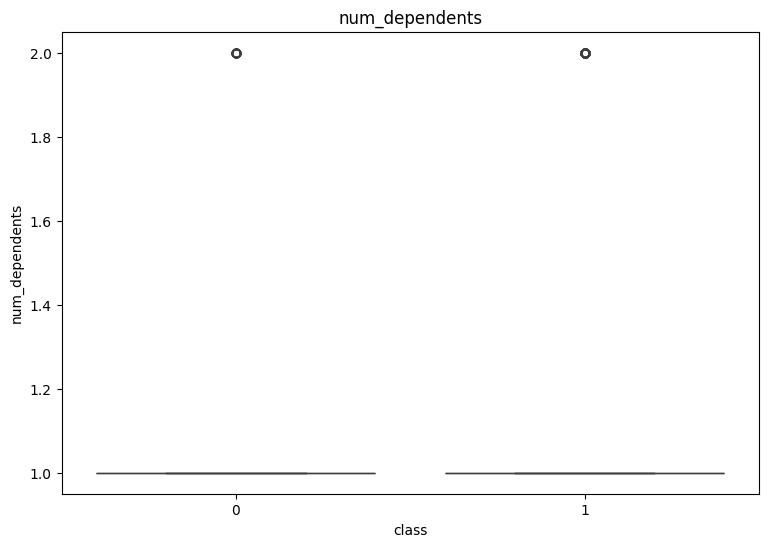

In [ ]:
for feature in num_features:
    plt.figure(figsize=(9, 6))
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(feature)

In [61]:
df['num_dependents'].unique()

array([1., 2.])